<a href="https://colab.research.google.com/github/nirmalpate/Hello_Fresh_Regression_Analysis/blob/main/Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
channel = pd.read_csv('/content/dim_marketing_channel.csv',sep = ';')

In [5]:
campaign = pd.read_csv('/content/dim_campaign.csv',sep = ';')

In [6]:
performance = pd.read_csv('/content/fact_marketing_performance.csv',sep = ';')

In [7]:
performance['date'] = pd.to_datetime(performance['date'])

/tmp/ipython-input-850004730.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  performance['date'] = pd.to_datetime(performance['date'])


In [8]:
performance.describe()

,performance_id,date,channel_key,campaign_key,spend,impressions,clicks,conversions,revenue,ctr,cpc,cpa,roas
count,1003.000000,1003,1003.000000,355.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,502.000000,2025-09-15 14:47:15.493519360,4.492522,5.783099,4071.920399,78589.372881,2127.716849,183.801595,14861.601944,24.025788,4.605713,79.846441,6.445344
min,1.000000,2025-06-19 00:00:00,1.000000,1.000000,212.310000,5022.000000,33.000000,2.000000,158.630000,0.519200,0.060000,0.580000,0.030000
25%,251.500000,2025-08-03 00:00:00,2.000000,3.000000,2155.440000,40352.500000,809.500000,52.000000,4028.630000,12.261500,1.005000,11.380000,1.040000
50%,502.000000,2025-09-13 00:00:00,4.000000,6.000000,4046.040000,78442.000000,1665.000000,126.000000,9565.450000,24.625000,2.040000,27.630000,2.760000
75%,752.500000,2025-10-30 00:00:00,7.000000,8.000000,5924.530000,114621.000000,3192.500000,258.000000,21259.165000,36.431000,4.875000,70.580000,6.945000
max,1003.000000,2025-12-15 00:00:00,8.000000,10.000000,7987.560000,149989.000000,7101.000000,1012.000000,103408.950000,49.968000,177.510000,3788.600000,156.600000
std,289.685462,NaN,2.358721,2.869230,2244.822668,42527.641409,1622.458193,174.638976,15219.356510,15.241357,9.776735,217.892930,12.125065


In [9]:
performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   performance_id  1003 non-null   int64         
 1   date            1003 non-null   datetime64[ns]
 2   channel_key     1003 non-null   int64         
 3   campaign_key    355 non-null    float64       
 4   country_code    1003 non-null   object        
 5   spend           1003 non-null   float64       
 6   impressions     1003 non-null   int64         
 7   clicks          1003 non-null   int64         
 8   conversions     1003 non-null   int64         
 9   revenue         1003 non-null   float64       
 10  ctr             1003 non-null   float64       
 11  cpc             1003 non-null   float64       
 12  cpa             1003 non-null   float64       
 13  roas            1003 non-null   float64       
 14  created_at      1003 non-null   object        
dtypes: d

In [10]:
merged_df = pd.merge(performance, channel[['channel_name','channel_type', 'channel_key']], on = 'channel_key', how = 'left')

In [11]:
merged_df.dropna(subset=['revenue'], inplace=True)

In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   performance_id  1003 non-null   int64         
 1   date            1003 non-null   datetime64[ns]
 2   channel_key     1003 non-null   int64         
 3   campaign_key    355 non-null    float64       
 4   country_code    1003 non-null   object        
 5   spend           1003 non-null   float64       
 6   impressions     1003 non-null   int64         
 7   clicks          1003 non-null   int64         
 8   conversions     1003 non-null   int64         
 9   revenue         1003 non-null   float64       
 10  ctr             1003 non-null   float64       
 11  cpc             1003 non-null   float64       
 12  cpa             1003 non-null   float64       
 13  roas            1003 non-null   float64       
 14  created_at      1003 non-null   object        
 15  chan

In [13]:
merged_df['Month'] = merged_df['date'].dt.month

In [14]:
monthly_revenue = merged_df.groupby('Month')['revenue'].sum()

In [15]:
monthly_revenue

,revenue
Month,
6,782135.85
7,2418922.32
8,2836590.59
9,2372470.45
10,2839640.44
11,2481914.52
12,1174512.58


In [16]:
merged_df
channel_stats = merged_df.groupby('channel_name')['impressions', 'clicks', 'revenue'].sum()

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [17]:
merged_df

,performance_id,date,channel_key,campaign_key,country_code,spend,impressions,clicks,conversions,revenue,ctr,cpc,cpa,roas,created_at,channel_name,channel_type,Month
0,1,2025-12-15,2,7.0,US,4243.83,147237,3797,102,9160.69,25.788,1.12,41.61,2.16,2025-12-15 15:19:39.358573,Meta Ads,Social,12
1,2,2025-12-15,8,NaN,UK,3617.31,75007,2228,313,30004.18,29.704,1.62,11.56,8.29,2025-12-15 15:19:39.358611,Referral,Referral,12
2,3,2025-12-15,2,1.0,AU,306.66,67730,2501,151,10968.53,36.926,0.12,2.03,35.77,2025-12-15 15:19:39.358633,Meta Ads,Social,12
3,4,2025-12-15,4,NaN,US,4169.20,45362,1244,140,8662.36,27.424,3.35,29.78,2.08,2025-12-15 15:19:39.358686,Display Network,Display,12
4,5,2025-12-15,8,NaN,CA,4875.15,149510,1720,77,7677.16,11.504,2.83,63.31,1.57,2025-12-15 15:19:39.358720,Referral,Referral,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,999,2025-06-19,7,8.0,US,814.27,81053,993,107,9638.16,12.251,0.82,7.61,11.84,2025-12-15 15:19:39.379288,Direct Traffic,Direct,6
999,1000,2025-06-19,4,4.0,UK,7939.78,47217,2346,199,17651.12,49.685,3.38,39.90,2.22,2025-12-15 15:19:39.379304,Display Network,Display,6
1000,1001,2025-06-19,6,NaN,DE,3561.03,81242,1723,226,25143.49,21.208,2.07,15.76,7.06,2025-12-15 15:19:39.379320,Organic Search,Search,6
1001,1002,2025-06-19,7,NaN,AU,7956.36,24660,1186,111,5304.97,48.094,6.71,71.68,0.67,2025-12-15 15:19:39.379336,Direct Traffic,Direct,6


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [19]:
merged_df['DayOfWeek'] = merged_df['date'].dt.dayofweek

In [20]:
merged_df

,performance_id,date,channel_key,campaign_key,country_code,spend,impressions,clicks,conversions,revenue,ctr,cpc,cpa,roas,created_at,channel_name,channel_type,Month,DayOfWeek
0,1,2025-12-15,2,7.0,US,4243.83,147237,3797,102,9160.69,25.788,1.12,41.61,2.16,2025-12-15 15:19:39.358573,Meta Ads,Social,12,0
1,2,2025-12-15,8,NaN,UK,3617.31,75007,2228,313,30004.18,29.704,1.62,11.56,8.29,2025-12-15 15:19:39.358611,Referral,Referral,12,0
2,3,2025-12-15,2,1.0,AU,306.66,67730,2501,151,10968.53,36.926,0.12,2.03,35.77,2025-12-15 15:19:39.358633,Meta Ads,Social,12,0
3,4,2025-12-15,4,NaN,US,4169.20,45362,1244,140,8662.36,27.424,3.35,29.78,2.08,2025-12-15 15:19:39.358686,Display Network,Display,12,0
4,5,2025-12-15,8,NaN,CA,4875.15,149510,1720,77,7677.16,11.504,2.83,63.31,1.57,2025-12-15 15:19:39.358720,Referral,Referral,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,999,2025-06-19,7,8.0,US,814.27,81053,993,107,9638.16,12.251,0.82,7.61,11.84,2025-12-15 15:19:39.379288,Direct Traffic,Direct,6,3
999,1000,2025-06-19,4,4.0,UK,7939.78,47217,2346,199,17651.12,49.685,3.38,39.90,2.22,2025-12-15 15:19:39.379304,Display Network,Display,6,3
1000,1001,2025-06-19,6,NaN,DE,3561.03,81242,1723,226,25143.49,21.208,2.07,15.76,7.06,2025-12-15 15:19:39.379320,Organic Search,Search,6,3
1001,1002,2025-06-19,7,NaN,AU,7956.36,24660,1186,111,5304.97,48.094,6.71,71.68,0.67,2025-12-15 15:19:39.379336,Direct Traffic,Direct,6,3


In [21]:
df_ml = pd.get_dummies(merged_df, columns=['channel_name', 'country_code'], drop_first=True)

In [22]:
features = [col for col in df_ml.columns if 'channel_name_' in col or 'country_code_' in col]

In [23]:
features = [col for col in df_ml.columns if 'channel_name_' in col or 'country_code_' in col]
features.extend(['impressions', 'clicks', 'DayOfWeek', 'Month'])

In [24]:
X = df_ml[features]
y = df_ml['revenue']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [27]:
y_pred = model.predict(X_test)

In [28]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"--- Model Performance ---")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")

--- Model Performance ---
R-squared (R²): 0.5757
Mean Absolute Error (MAE): $6687.75
Root Mean Squared Error (RMSE): $9596.80


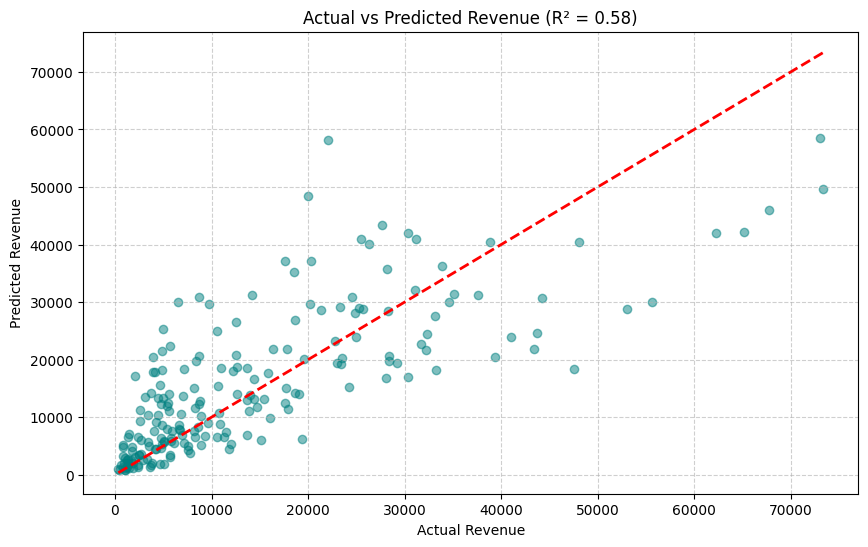

/tmp/ipython-input-223832260.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_df.head(10), palette='viridis')


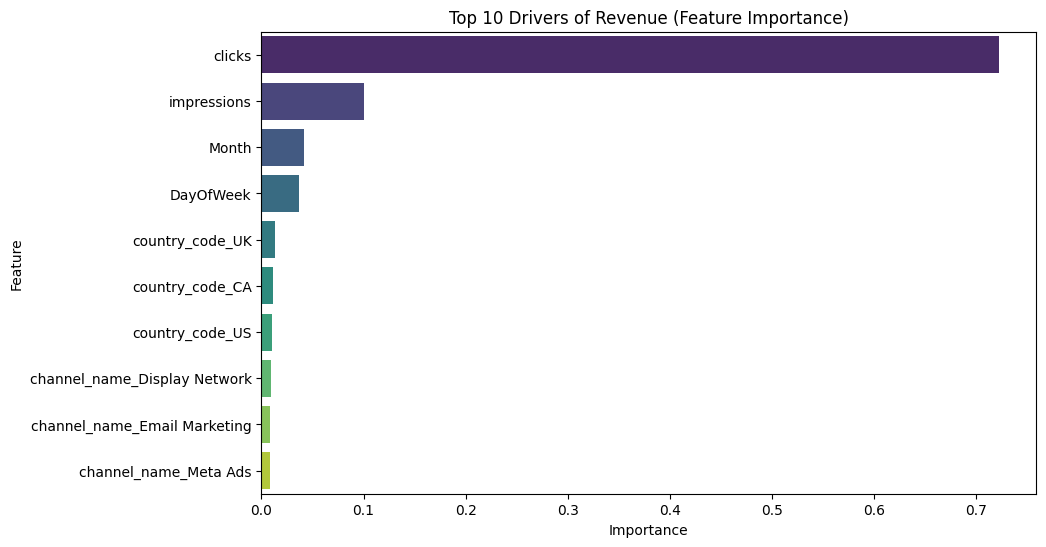

In [29]:
# --- 6. VISUALIZATION ---
# Plot 1: Actual vs Predicted Revenue
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f'Actual vs Predicted Revenue (R² = {r2:.2f})')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Plot 2: Top Drivers of Revenue
importances = model.feature_importances_
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(10), palette='viridis')
plt.title('Top 10 Drivers of Revenue (Feature Importance)')
plt.show()

In [1]:
# In Depth Analysis Of Revenue Charts

In [51]:
daily_revenue = merged_df.groupby('date').agg({'revenue':'sum','spend':'sum','conversions':'sum','clicks':'sum','spend':'sum'}).sort_index()

In [52]:
daily_revenue['AOV'] = daily_revenue['revenue'] / daily_revenue['conversions']
daily_revenue['ROAS'] = daily_revenue['revenue'] / daily_revenue['spend']

In [53]:
analysis = seasonal_decompose(daily_revenue['revenue'], period = 7)

In [37]:
daily_revenue['residuals'] = analysis.resid

In [38]:
daily_revenue

,revenue,spend,conversions,clicks,AOV,ROAS,residuals
date,,,,,,,
2025-06-19,92303.21,26970.01,1111,11836,83.081197,3.422439,NaN
2025-06-20,56649.16,19706.57,666,8578,85.058799,2.874633,NaN
2025-06-21,42719.84,21730.15,691,8027,61.823213,1.965925,NaN
2025-06-22,48470.42,17912.99,731,5520,66.307004,2.705881,-11609.881127
2025-06-23,104723.35,24418.60,1305,15075,80.247778,4.288671,31097.256245
...,...,...,...,...,...,...,...
2025-12-11,104282.85,11755.49,882,8069,118.234524,8.870991,42429.202359
2025-12-12,29748.34,14803.63,414,6676,71.855894,2.009530,-27259.011127
2025-12-13,57507.97,17278.61,540,5048,106.496241,3.328275,NaN


In [39]:
# Peak Detection

In [40]:
thresold  = daily_revenue['residuals'].std() *1.5

In [41]:
peaks = daily_revenue[daily_revenue['residuals'] > thresold]

In [42]:
peaks

,revenue,spend,conversions,clicks,AOV,ROAS,residuals
date,,,,,,,
2025-07-09,175491.45,33642.03,1972,16357,88.991608,5.216435,77241.126187
2025-08-11,253726.81,24328.31,2867,24264,88.499062,10.429282,127382.553387
2025-08-25,200931.18,32146.64,2642,27630,76.052680,6.250457,95663.330530
2025-09-21,147509.64,34866.33,1559,20458,94.618114,4.230719,66615.904587
2025-10-01,199021.77,27838.83,2885,24167,68.985016,7.149071,75920.429045
2025-10-12,176623.73,12890.15,1945,14922,90.809116,13.702225,90171.547445
2025-10-21,248555.72,38602.52,2904,21741,85.590813,6.438847,138150.905673
2025-10-23,165914.92,35539.41,1973,18193,84.092712,4.668477,72900.730930
2025-11-07,157308.58,5995.80,1441,13947,109.166260,26.236462,72872.428873


In [43]:
def define_peak(row):
  aov = daily_revenue['AOV'].mean()
  if row['AOV'] < (aov * 90):
    return "Price_Drop"
  elif row['ROAS'] > daily_revenue['ROAS'].mean():
    return "Marketing_Win"
  else:
    return "No_Change"

In [45]:
peaks['reason'] = peaks.apply(define_peak, axis=1)

/tmp/ipython-input-3480278178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peaks['reason'] = peaks.apply(define_peak, axis=1)


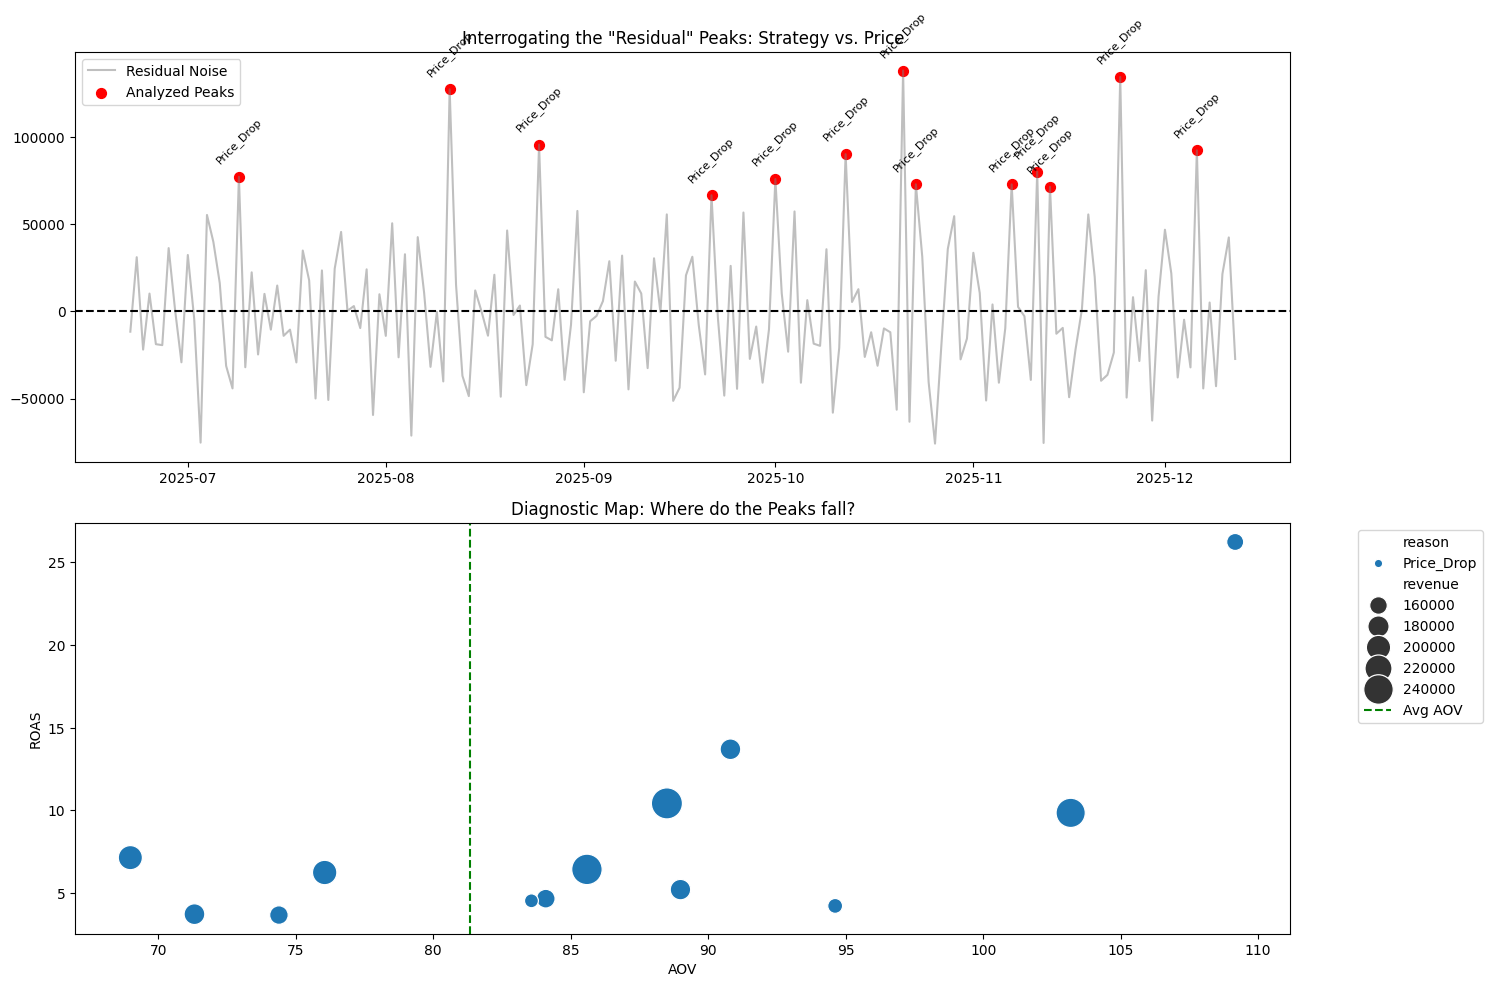

--- PEAK ANALYSIS REPORT ---
              revenue         AOV       ROAS      reason
date                                                    
2025-08-11  253726.81   88.499062  10.429282  Price_Drop
2025-10-21  248555.72   85.590813   6.438847  Price_Drop
2025-11-24  237939.90  103.182958   9.856020  Price_Drop
2025-08-25  200931.18   76.052680   6.250457  Price_Drop
2025-10-01  199021.77   68.985016   7.149071  Price_Drop
2025-11-11  177436.34   71.316857   3.731411  Price_Drop
2025-10-12  176623.73   90.809116  13.702225  Price_Drop
2025-07-09  175491.45   88.991608   5.216435  Price_Drop
2025-10-23  165914.92   84.092712   4.668477  Price_Drop
2025-12-06  164994.85   74.389022   3.676983  Price_Drop
2025-11-07  157308.58  109.166260  26.236462  Price_Drop
2025-09-21  147509.64   94.618114   4.230719  Price_Drop
2025-11-13  143493.82   83.572405   4.539767  Price_Drop


In [47]:
plt.figure(figsize=(15, 10))

# Top Plot: Residuals with labeled peaks
plt.subplot(2, 1, 1)
plt.plot(daily_revenue.index, daily_revenue['residuals'], color='gray', alpha=0.5, label='Residual Noise')
plt.scatter(peaks.index, peaks['residuals'], color='red', s=50, label='Analyzed Peaks')

# Annotate each peak on the graph
for idx, row in peaks.iterrows():
    plt.annotate(row['reason'], (idx, row['residuals']),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, rotation=45)

plt.title('Interrogating the "Residual" Peaks: Strategy vs. Price')
plt.axhline(0, color='black', linestyle='--')
plt.legend()

# Bottom Plot: AOV vs ROAS to show the "Why"
plt.subplot(2, 1, 2)
sns.scatterplot(data=peaks, x='AOV', y='ROAS', size='revenue', hue='reason', sizes=(100, 500))
plt.axvline(daily_revenue['AOV'].mean(), color='green', linestyle='--', label='Avg AOV')
plt.title('Diagnostic Map: Where do the Peaks fall?')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# --- 6. PRINT SUMMARY REPORT ---
print("--- PEAK ANALYSIS REPORT ---")
print(peaks[['revenue', 'AOV', 'ROAS', 'reason']].sort_values(by='revenue', ascending=False))

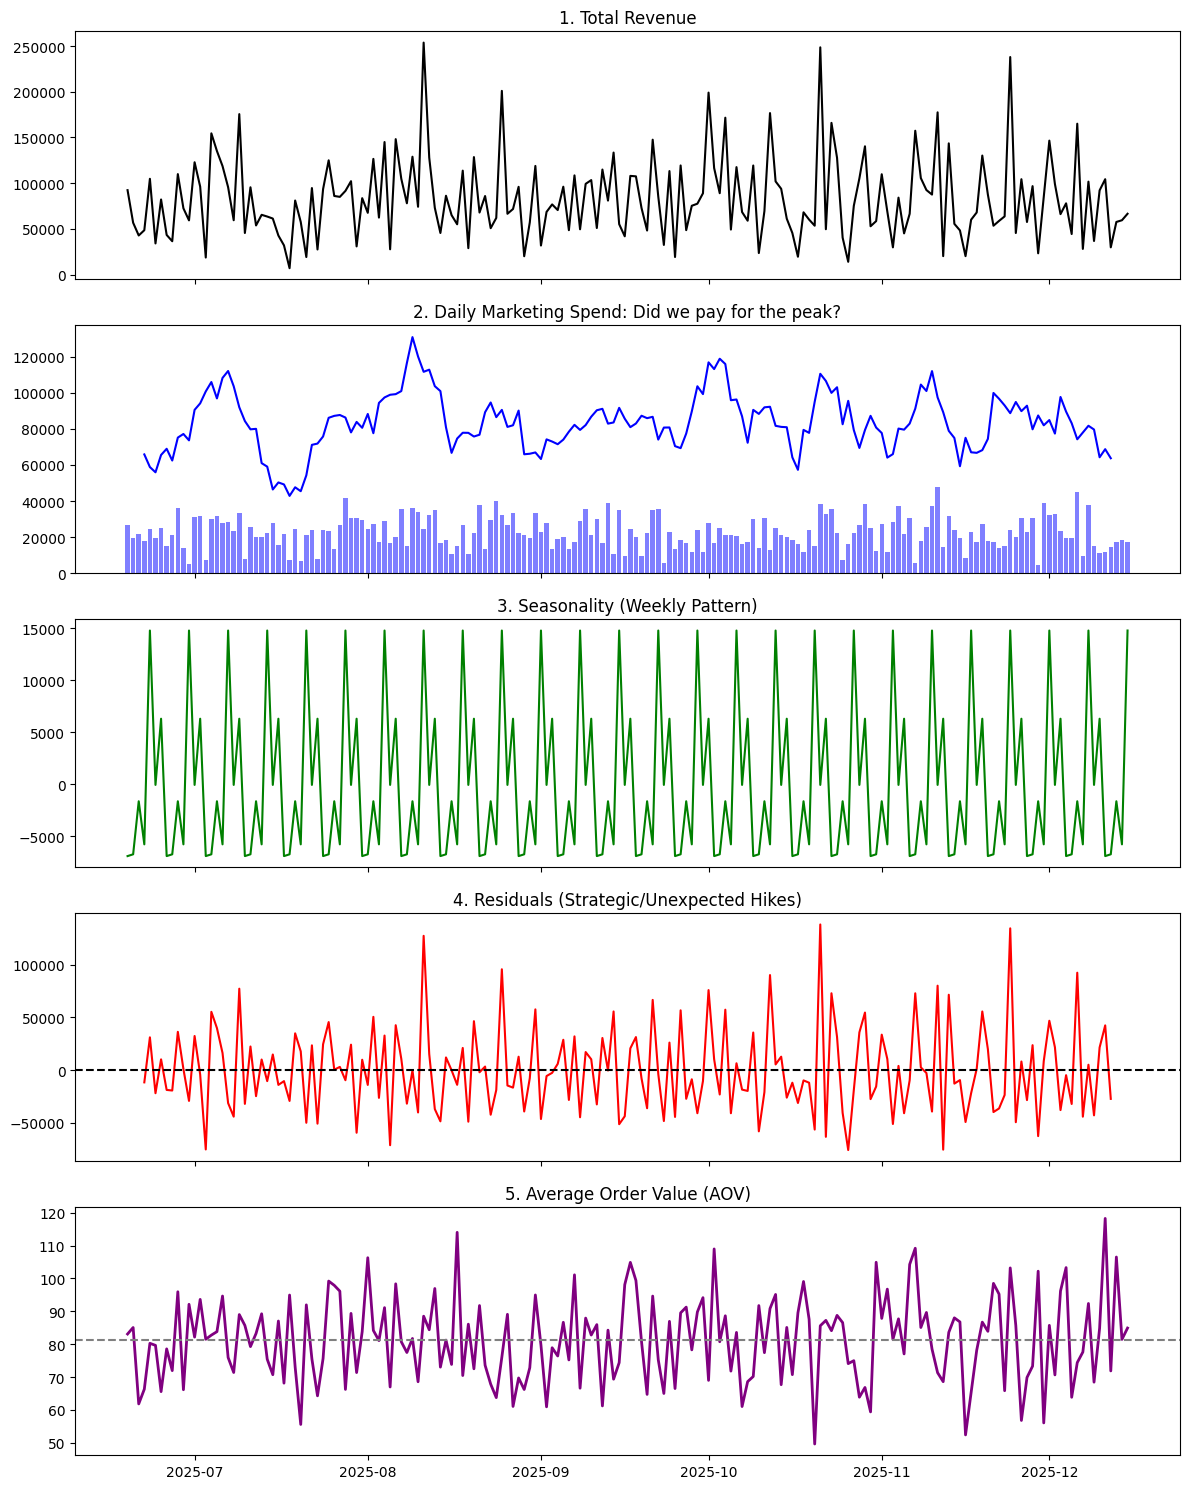

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. Load and Prepare Data


# 2. Calculate AOV (The Price Proxy)
daily_revenue['AOV'] = daily_revenue['revenue'] / daily_revenue['conversions']

# 3. Decompose Revenue
result = seasonal_decompose(daily_revenue['revenue'], model='additive', period=7)

# 4. Create the 5-Panel Plot (Trend, Seasonal, Resid + AOV)
fig, axes = plt.subplots(5, 1, figsize=(12, 15), sharex=True)

# Panel 1: Actual Revenue
axes[0].plot(daily_revenue['revenue'], color='black', label='Actual Revenue')
axes[0].set_title('1. Total Revenue')

# Panel 2: Trend (The Legacy/Long-term Growth)
axes[1].plot(result.trend, color='blue')
axes[1].set_title('2. Trend (Brand Value)')

# Panel 3: Seasonal (The Weekly Calendar)
axes[2].plot(result.seasonal, color='green')
axes[2].set_title('3. Seasonality (Weekly Pattern)')

# Panel 4: Residuals (The Unexpected Hikes)
axes[3].plot(result.resid, color='red')
axes[3].axhline(0, color='black', linestyle='--')
axes[3].set_title('4. Residuals (Strategic/Unexpected Hikes)')

# Panel 5: AOV (The Price Checker)
axes[4].plot(daily_revenue['AOV'], color='purple', linewidth=2)
axes[4].axhline(daily_revenue['AOV'].mean(), color='gray', linestyle='--', label='Avg AOV')
axes[4].set_title('5. Average Order Value (AOV)')

axes[1].bar(daily_revenue.index, daily_revenue['spend'], color='blue', alpha=0.5)
axes[1].set_title('2. Daily Marketing Spend: Did we pay for the peak?')

plt.tight_layout()
plt.show()

In [58]:
def diagnose_peak(row):
    avg_aov = daily_revenue['AOV'].mean()
    avg_spend = daily_revenue['spend'].mean()

    # If AOV is significantly lower than average
    if row['AOV'] < (avg_aov * 0.95):
        return "Price Drop / Discount Campaign"

    # If Spend is significantly higher than average
    elif row['spend'] > (avg_spend * 1.3):
        return "Aggressive Marketing Strategy (High Spend)"

    # If Spend is low but Revenue is high
    elif row['spend'] < avg_spend and row['revenue'] > daily_revenue['revenue'].mean():
        return "Organic Brand Moment / Viral Event"

    # High AOV and High Revenue
    else:
        return "Strategic Premium Win (Upselling)"

# Create a copy to avoid SettingWithCopyWarning
peaks_copy = peaks.copy()
peaks_copy['Final_Reasoning'] = peaks_copy.apply(diagnose_peak, axis=1)

# 3. Output the Summary Table
print("--- PEAK ANALYSIS SUMMARY ---")
print(peaks_copy[['revenue', 'spend', 'AOV', 'Final_Reasoning']].sort_values(by='revenue', ascending=False).head(5))

--- PEAK ANALYSIS SUMMARY ---
              revenue     spend         AOV  \
date                                          
2025-08-11  253726.81  24328.31   88.499062   
2025-10-21  248555.72  38602.52   85.590813   
2025-11-24  237939.90  24141.58  103.182958   
2025-08-25  200931.18  32146.64   76.052680   
2025-10-01  199021.77  27838.83   68.985016   

                                       Final_Reasoning  
date                                                    
2025-08-11           Strategic Premium Win (Upselling)  
2025-10-21  Aggressive Marketing Strategy (High Spend)  
2025-11-24           Strategic Premium Win (Upselling)  
2025-08-25              Price Drop / Discount Campaign  
2025-10-01              Price Drop / Discount Campaign  
